<a href="https://colab.research.google.com/github/Felipe0Parra/IO/blob/main/OF_Entrega_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrega 2 Introducción a optica de Fourier

### Librerías

In [ ]:
import numpy as np
import scipy as sp
from scipy.fft import fft2
from scipy.fft import ifft2
from scipy.fft import fftfreq
from scipy.fft import fftshift, ifftshift
from scipy.signal import convolve2d

import imageio
import cv2
import os

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import animation
from matplotlib.animation import PillowWriter
import pint

from PIL import Image

u = pint.UnitRegistry()

### Funciones auxiliares

Abrir una URL:

In [ ]:
def URL_ADAP(URL):
    URL = str(URL)
    URL2 = URL.replace('\\', '/')
    return URL2

Normalizar una matriz:

In [ ]:
def normalize_image(image):
    normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image))
    return normalized_image

Calcular intensidad:

In [ ]:
def intensidad_del_campo(campo):
    intensidad_espectro_imagen = np.abs(campo)**2
    return intensidad_espectro_imagen

## Simulaciones para el punto 2

EL objetivo de este bloque es mostrar el efecto de una lente convergente sobre una mascara cualquiera, en este caso en general rejillas, cuando esta está ubicada en el foco anterior de la lente. De manera que en el foco posterior obtenga la transformada de Fourier exacta de la imagen. Por lo cual el primer paso importante es definir mis mascaras, pues el proceso de la transformada surge facilmente usando las librerías.

Definamos los parametros fisicos de nuestro sistema:

## Rejilla con pinholes circulares


La descripción matematica de la rejilla se da medienta la convolución de una función peine con una función circulo, de la misma forma para la rejilla con pinholes rectangulares. Recordemos ademas, que según las propiedades de la transformada de Fourier, la trasnformada de la rejilla, es decir, de nuestra convolución es igual a la multiplicación de los espectros de las funciones convolucionadas. Por lo cual podemos esperar un espectro reproducible y caracterizable.

In [ ]:
tamaño_plano = 2
N_pixels = 2500

In [ ]:
x = np.linspace(-tamaño_plano, tamaño_plano, N_pixels)
xv, yv = np.meshgrid(x, x)

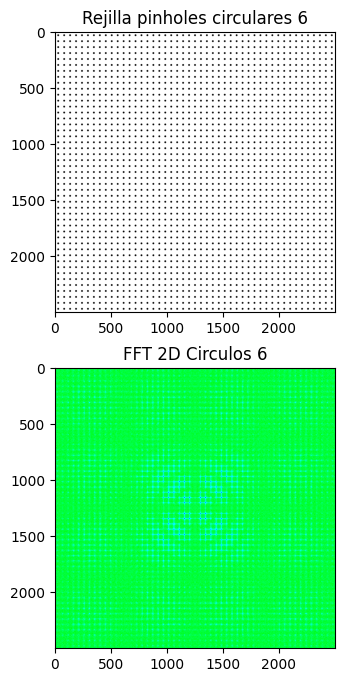

In [ ]:
size_pinhole = 1.3
number_pinholes = 0.085
malla = (0.5 + 0.5 * size_pinhole * np.cos((xv/number_pinholes) * 2 * np.pi)) * (0.5 + 0.5 * size_pinhole * np.cos((yv/number_pinholes) * 2 * np.pi))
peine = np.where(malla > 1, 0, 1)
espectro = fftshift(fft2(peine))
intensidad = np.log(0.0001 + np.abs(espectro)**2)

plt.figure(figsize = (4, 8))
plt.subplot(2, 1, 1)
plt.imshow(peine, cmap = 'gray')
plt.title('Rejilla pinholes circulares 6')

plt.subplot(2, 1, 2)
plt.imshow(intensidad, cmap = 'hsv')
plt.title('FFT 2D Circulos 6')


plt.show()

plt.imsave(r'C:\Users\Felipe\Pictures\Optica_Proyecto\Peine_OF_1.png', peine, cmap = 'gray')

Recordemos ademas que todas las imagenes se pueden mostrar escaladas a las unidades correpondientes en mm según los pixeles que tengan, así, o en pixeles con plt. convencional. Sin embargo, es muy importante tener en cuenta que este procedimiento puede reducir significativamente la definición de mi imagen.

Transformada de Fourier de la imagen proyectada en el foco posterior de la lente si la rejilla está en el foco.

Mostrando la intensidad del espectro en el punto focal de la lente, modificada de tal forma que sea visible toda su extensión:

## Prubas de comprobación del espectro

## Construyendo las imagenes por el metodo de la convolución:

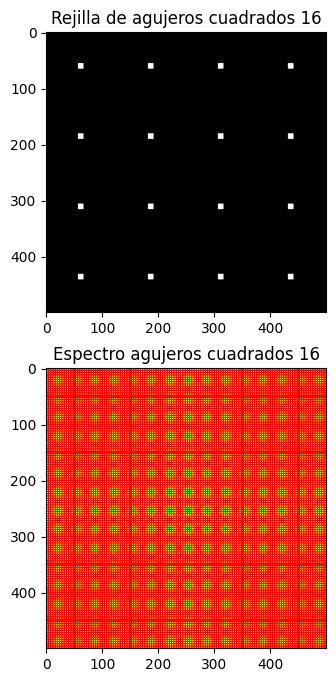

In [ ]:
n = 4

c_pixels = 500

Nx, Ny = c_pixels, c_pixels
Tx, Ty = int(Nx/n), int(Ny/n)
dx = int(c_pixels/((2*n)))

peine_c = np.zeros((Nx, Ny))
peine_c[dx::Tx, dx::Ty] = 1


Wx, Wy = 10, 10
pinhole_c = np.zeros((Tx, Ty))
pinhole_c[Tx//2 - Wy//2:Tx//2 + Wy//2, Ty//2 - Wx//2:Ty//2 + Wx//2] = 1

rejilla = convolve2d(peine_c, pinhole_c, mode="same")

espectro_c = fftshift(fft2(rejilla))
intensidad_espectro_c = np.log(0.0001 + np.abs(espectro_c)**2)

plt.figure(figsize = (4, 8))

plt.subplot(2, 1, 1)
plt.imshow(rejilla, cmap = 'gray')
plt.title(f"Rejilla de agujeros cuadrados {n**2}")

plt.subplot(2, 1, 2)
plt.imshow(intensidad_espectro_c, cmap = 'hsv')
plt.title(f"Espectro agujeros cuadrados {n**2}")

plt.show()

plt.imsave(r'C:\Users\Felipe\Pictures\Optica_Proyecto\Rejilla cuadrados.png', rejilla, cmap = 'gray')

In [ ]:
m = 0
while m < 10:

    m = m + 1
    print(m)

1
2
3
4
5
6
7
8
9
10


- Funcionamiento perfecto para un solo rectangulo.


485
[485, 1484] 29


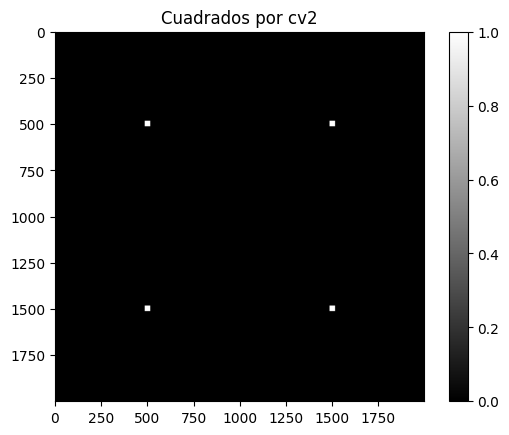

In [ ]:
lienzo_cuadrados = np.zeros((2000, 2000))

n_rects_V = 2
n_rects_H = 2

if int(200/n_rects_H)//2 == 0:
    tamaño_rectangulo = int(80/n_rects_H) + 2
else:
    tamaño_rectangulo = int(80/n_rects_H) - 11


d = int((np.shape(lienzo_cuadrados)[0] - n_rects_H * tamaño_rectangulo)/(2 * n_rects_H))
print(d)

l = 0
lista_pasos = []

while l < (n_rects_H + n_rects_V)/2:
    pasos = d + l * ( 2 * d + tamaño_rectangulo) # Se deben ajustar los pasos
    lista_pasos = lista_pasos + [pasos]
    l = l + 1

for p in lista_pasos:
    for t in lista_pasos:
        cv2.rectangle(lienzo_cuadrados, (t, p), (t + tamaño_rectangulo, p + tamaño_rectangulo), 1, -1)

print(lista_pasos, tamaño_rectangulo)

plt.imshow(lienzo_cuadrados, cmap = 'gray')
plt.title('Cuadrados por cv2')
plt.colorbar()
plt.show()

plt.imsave(r'C:\Users\Felipe\Pictures\Optica_Proyecto\Cuadrado Pruebas cv2.png', lienzo_cuadrados, cmap = 'gray')

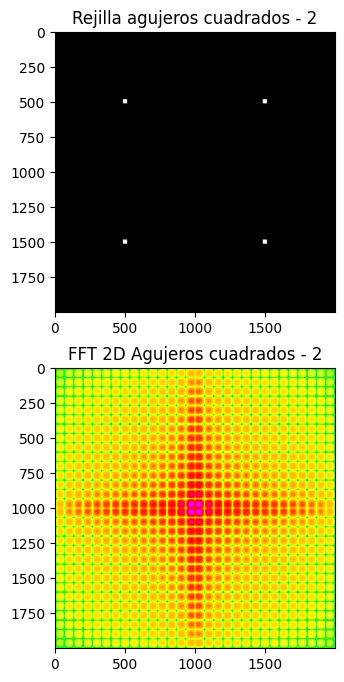

In [ ]:
img_prueba = cv2.imread(URL_ADAP(r'C:\Users\Felipe\Pictures\Optica_Proyecto\Cuadrado Pruebas cv2.png'), 0)
fft_prueba = np.fft.fftshift(np.fft.fft2(img_prueba))
espectro_pruebas = normalize_image(np.log(0.0001 + np.abs(fft_prueba)**2))

plt.figure(figsize = (4, 8))
plt.subplot(2, 1, 1)
plt.imshow(img_prueba, cmap = 'gray')
plt.title(f"Rejilla agujeros cuadrados - {n_rects_H}")

plt.subplot(2, 1, 2)
plt.imshow(espectro_pruebas, cmap = 'gist_ncar')
plt.title(f"FFT 2D Agujeros cuadrados - {n_rects_H}")

plt.show()

## Transformada por un lente convergente

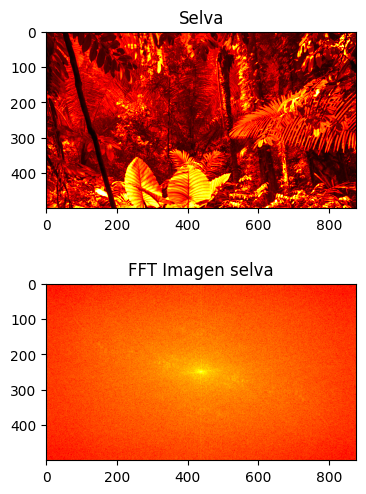

In [ ]:
selva = cv2.imread(URL_ADAP(r'C:\Users\Felipe\Pictures\Optica_Proyecto\Rainforest_5.jpg'), 0)
fft_selva = np.log(0.0001 + np.abs(fftshift(fft2(selva))**2))

plt.figure(figsize = (4, 6))

plt.subplot(2, 1, 1)
plt.imshow(selva, cmap = 'hot')
plt.title(f"Selva")

plt.subplot(2, 1, 2)
plt.imshow(np.abs(fft_selva), cmap = 'hot')
plt.title(f"FFT Imagen selva")

plt.show()

## Replicando el experimento de la formación de imagenes con la letra E

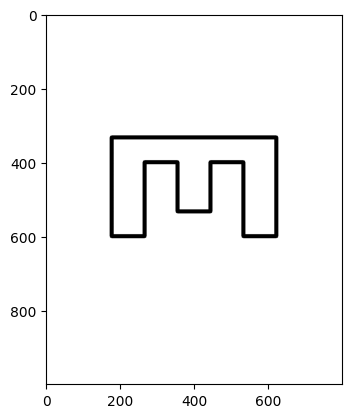

In [ ]:
# (y, x), (vertical, horizontal)
letra_E = np.zeros((1000, 800))
grosor_linea = 10

# Valor por unidad en eje
v = 88.889
h = 66.667

# Horizontales
cv2.line(letra_E, (int(2*v), int(5*h)), (int(2*v), int(9*h)), 1, grosor_linea)
cv2.line(letra_E, (int(7*v), int(5*h)), (int(7*v), int(9*h)), 1, grosor_linea)
cv2.line(letra_E, (int(3*v), int(6*h)), (int(3*v), int(9*h)), 1, grosor_linea)
cv2.line(letra_E, (int(4*v), int(6*h)), (int(4*v), int(8*h)), 1, grosor_linea)
cv2.line(letra_E, (int(5*v), int(6*h)), (int(5*v), int(8*h)), 1, grosor_linea)
cv2.line(letra_E, (int(6*v), int(6*h)), (int(6*v), int(9*h)), 1, grosor_linea)

# Verticales
cv2.line(letra_E, (int(2*v), int(5*h)), (int(7*v), int(5*h)), 1, grosor_linea)
cv2.line(letra_E, (int(2*v), int(9*h)), (int(3*v), int(9*h)), 1, grosor_linea)
cv2.line(letra_E, (int(3*v), int(6*h)), (int(4*v), int(6*h)), 1, grosor_linea)
cv2.line(letra_E, (int(4*v), int(8*h)), (int(5*v), int(8*h)), 1, grosor_linea)
cv2.line(letra_E, (int(5*v), int(6*h)), (int(6*v), int(6*h)), 1, grosor_linea)
cv2.line(letra_E, (int(6*v), int(9*h)), (int(7*v), int(9*h)), 1, grosor_linea)

plt.imshow(letra_E, cmap = 'gray_r')
plt.show()

plt.imsave(r'C:\Users\Felipe\Pictures\Optica_Proyecto\letra_E.png', letra_E, cmap = 'gray')

In [ ]:
print(f"Las dimensiones de la transmitancia de la letra E son: {np.shape(letra_E)}")

Las dimensiones de la transmitancia de la letra E son: (1000, 800)


In [ ]:
lam = 633.33 * u.nm

In [ ]:
def select_cmap_for_wavelength(wavelength_nm):
    """
    Selecciona un cmap adecuado basado en la longitud de onda.

    Parámetro:
        wavelength_nm (float): Longitud de onda en nanómetros (nm)

    Retorno:
        str: Nombre del cmap para el rango de longitud de onda
    """
    if wavelength_nm < 450:
        color_violeta = [(0, 0, 0),
                         (50/250, 0, 50/250),
                         (100/250, 0, 100/250),
                         (150/250, 0, 150/250),
                         (200/250, 0, 200/250),
                         (250/250, 0, 250/250)]
        return color_violeta

    elif 450 <= wavelength_nm < 495:
        color_azul = [(0, 0, 0),
                      (0, 0, 50/250),
                      (0, 0, 100/250),
                      (0, 0, 150/250),
                      (0, 0, 200/250),
                      (0, 0, 250/250)]
        return color_azul   # Azul

    elif 495 <= wavelength_nm < 570:
        color_verde = [(0, 0, 0),
                       (0, 50/250, 0),
                       (0, 100/250, 0),
                       (0, 150/250, 0),
                       (0, 200/250, 0),
                       (0, 250/250, 0)]
        return color_verde   # Verde

    elif 570 <= wavelength_nm < 590:
        color_naranja = [(0, 0, 0),
                       (50/250, 50/250, 0),
                       (100/250, 100/250, 0),
                       (150/250, 150/250, 0),
                       (200/250, 200/250, 0),
                       (250/250, 250/250, 0)]
        return color_naranja  # Naranja

    elif 590 <= wavelength_nm:
        color_rojo = [(0, 0, 0),
                       (0/250, 0, 0),
                       (0/250, 0, 0),
                       (0/250, 0, 0),
                       (100/250, 0, 0),
                       (250/250, 0, 0)]
        return color_rojo     # Rojo Claro

    else:
        return color_rojo # Rojo Oscuro para >620 nm

# Ejemplo de uso:
wavelength = lam * (1/(u.nm)) # Longitud de onda en nanómetros
cmap = select_cmap_for_wavelength(wavelength)

cmap_spectrum = LinearSegmentedColormap.from_list("spectrum", cmap, N=256)

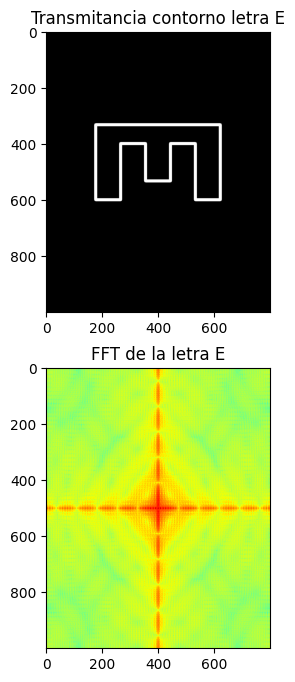

In [ ]:
img_letra_E = cv2.imread(URL_ADAP(r'C:\Users\Felipe\Pictures\Optica_Proyecto\letra_E.png'), 0)
espectro_letra_E = fftshift(fft2(img_letra_E))
intensidad_espectro_letra_E = np.log(0.0001 + np.abs(espectro_letra_E)**2)

plt.figure(figsize = (5, 8))

plt.subplot(2, 1, 1)
plt.imshow(img_letra_E, cmap = 'gray')
plt.title('Transmitancia contorno letra E')

plt.subplot(2, 1, 2)
plt.imshow(intensidad_espectro_letra_E, cmap = 'jet')
plt.title('FFT de la letra E')

plt.show()

### Pupila rectangular amplia

### Pupila circular

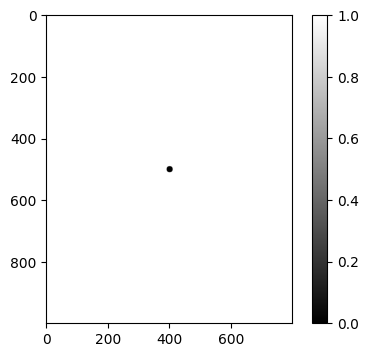

In [ ]:
pupila_circular_E = np.ones(np.shape(letra_E), dtype = "uint8")
coordx = int(np.shape(letra_E)[0]/2)
coordy = int(np.shape(letra_E)[1]/2)
cv2.circle(pupila_circular_E, (coordy, coordx), 10, 0, -1)

plt.figure(figsize = (5, 4))
plt.imshow(pupila_circular_E, cmap = 'gray')
plt.colorbar()
plt.show()

## Filtremos el espectro de la letra E de tal manera que quitemos las lineas horizontales

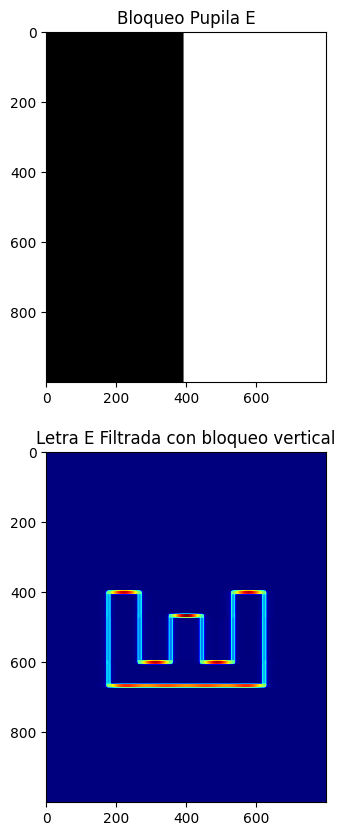

In [ ]:
pupila_E = np.ones((1000, 800))

cv2.rectangle(pupila_E, (0,0), (392, 1000), 0, -1)


letra_E_horizontales = fft2(pupila_E * espectro_letra_E)
intensidad_EH = np.abs(letra_E_horizontales)**2

plt.figure(figsize = (6, 10))

plt.subplot(2, 1, 1)
plt.imshow(pupila_E, cmap = 'gray')
plt.title('Bloqueo Pupila E')

plt.subplot(2, 1, 2)
plt.imshow(intensidad_EH, cmap = 'jet')
plt.title('Letra E Filtrada con bloqueo vertical')
plt.show()

## Patrón de Speckle

La parte mas retadora será construir la transmitancia que consista en una distribución aleatoria de pinholes con medios desfasadores de diferente magnitud.

Radios (x, y)[mm] : (1361, 798) ; con medio de fase: 1.2943361732789946 rads
Radios (x, y)[mm] : (764, 1556) ; con medio de fase: 0.611563369898813 rads
Radios (x, y)[mm] : (1512, 1762) ; con medio de fase: 1.26501464184549 rads
Radios (x, y)[mm] : (1835, 412) ; con medio de fase: 4.565781323217165 rads
Radios (x, y)[mm] : (1521, 953) ; con medio de fase: 5.2192325951638425 rads
Radios (x, y)[mm] : (1012, 442) ; con medio de fase: 1.8807668019490893 rads
Radios (x, y)[mm] : (1106, 327) ; con medio de fase: 3.0536280592892786 rads
Radios (x, y)[mm] : (725, 1853) ; con medio de fase: 0.020943951023931952 rads
Radios (x, y)[mm] : (1716, 1368) ; con medio de fase: 2.2158700183320006 rads
Radios (x, y)[mm] : (535, 1661) ; con medio de fase: 2.1237166338267 rads
Radios (x, y)[mm] : (1529, 782) ; con medio de fase: 2.57610597594363 rads
Radios (x, y)[mm] : (1504, 1403) ; con medio de fase: 3.707079331235956 rads
Radios (x, y)[mm] : (1476, 117) ; con medio de fase: 2.442064689390466 rads
Radio

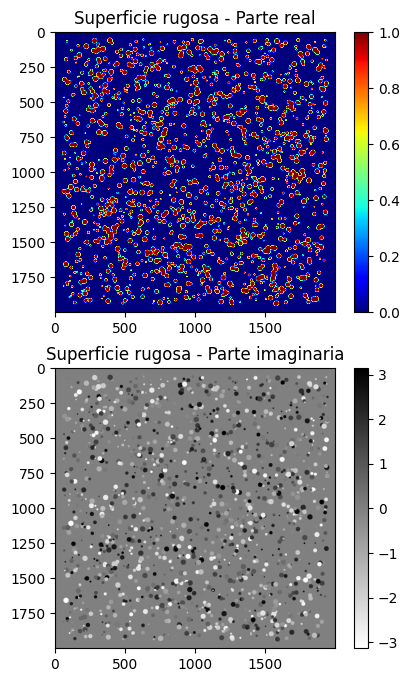

In [ ]:
superficie_speckle = np.zeros((2000, 2000))
superficie_fase = np.zeros((2000, 2000))

# Parametros
n_surfaces = 1500
r_max = 20
r_min = 5

# Definamos un par de intervalos
intervalo_fase = np.arange(0, 2 * np.pi, (2 * np.pi)/n_surfaces, dtype = 'float')
intervalo_espacio = np.arange(60, 1940)
intervalo_radio = np.arange(r_min, r_max, (r_max - r_min)/n_surfaces)

# Elegir elementos aleatorios del conjunto.
serie_fase = np.random.choice(intervalo_fase, n_surfaces, replace = False)
serie_espacio_o = np.random.choice(intervalo_espacio, n_surfaces, replace = False)  # Se escogen 2 para mezclar simplemente los centros
serie_espacio_u = np.random.choice(intervalo_espacio, n_surfaces, replace = False)
serie_radio = np.random.choice(intervalo_radio, n_surfaces, replace = False)

# Construir la superficie
for o in range(0, n_surfaces):

    cv2.circle(superficie_speckle, (serie_espacio_o[o], serie_espacio_u[o]), int(serie_radio[o]), 1, -1)
    cv2.circle(superficie_fase, (serie_espacio_o[o], serie_espacio_u[o]), int(serie_radio[o]), serie_fase[o], -1)

    print(f"Radios (x, y)[mm] : {(int(serie_espacio_o[o]), int(serie_espacio_u[o]))} ; con medio de fase: {serie_fase[o]} rads")

# Unificación del campo complejo
campo_speckle = superficie_speckle * np.exp(1j * superficie_fase)

plt.figure(figsize = (5, 8))

plt.subplot(2, 1, 1)
plt.imshow(intensidad_del_campo(campo_speckle), cmap = 'jet')
plt.title('Superficie rugosa - Parte real')
plt.colorbar()

plt.subplot(2, 1, 2)
plt.imshow(np.angle(campo_speckle), cmap = 'gray_r')
plt.title('Superficie rugosa - Parte imaginaria')
plt.colorbar()

plt.show()

plt.imsave(r'C:\Users\Felipe\Pictures\Optica_Proyecto\Superficie Rugosa.png', intensidad_del_campo(campo_speckle), cmap = 'gray')

## Patrón de speckle

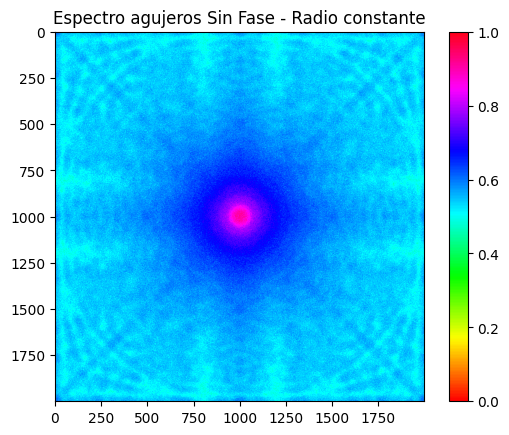

In [ ]:
fft_superficie_rugosa = fftshift(fft2(campo_speckle))
espectro_fft_SR = normalize_image(np.log(0.0001 + np.abs(fft_superficie_rugosa)**2))

plt.imshow(espectro_fft_SR, cmap = 'hsv')
plt.title('Espectro agujeros Sin Fase - Radio constante')
plt.colorbar()
plt.show()

No es necesario hacer proceso de contraste de fase dado que la imagen es visible. Recordar, ademas, que siempre tendremos disponible el github con mis avances.

In [ ]:
print(f"Forma de la matriz del campo: {np.shape(campo_speckle)}")

Forma de la matriz del campo: (2000, 2000)


## Propagando una onda plana que atraviesa la rendija anterior

### Utilizando el metodo de propagación por el espectro angular

In [ ]:
xp = np.shape(campo_speckle)[0]
yp = np.shape(campo_speckle)[1]

l_planex = 7.0656   # mm
l_planey = 7.0656  # mm

x_pea = np.linspace(0, l_planex, xp)
y_pea = np.linspace(0, l_planey, yp)

xv_pea, yv_pea = np.meshgrid(x_pea, y_pea)

In [ ]:
lam = 633.33e-6  # mm

Recordar que desde el siguiente bloque de comando podemos cambiar, solo cambiando el signo, si es propagación desde o hacia un foco.

## PEA

In [ ]:
def compute_A(UT, xv, yv, lam, z):
    A = fft2(UT)         # Campo U
    kx = 2 * np.pi * fftfreq(len(x_pea), np.diff(x_pea)[0])
    ky = 2 * np.pi * fftfreq(len(y_pea), np.diff(y_pea)[0])
    kxv, kyv = np.meshgrid(kx, ky)
    k = 2 * np.pi/lam
    return ifft2(A*np.exp(1j*z*np.sqrt(k**2-kxv**2-kyv**2)))

Propagando el campo:

In [ ]:
z_pea_speckle = 200

In [ ]:
propagacion_speckle = compute_A(campo_speckle, xv_pea, yv_pea, lam, z_pea_speckle)

Mostrando el resultado de la propagación, no usamos otro codigo pues, como imagen, no se puede exportar la información de la fase.

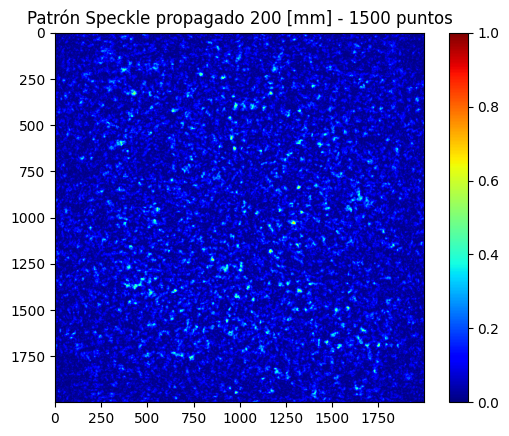

In [ ]:
spectrum_intensity_Speckle = normalize_image(intensidad_del_campo(propagacion_speckle))

plt.imshow(spectrum_intensity_Speckle, cmap = 'jet')
plt.title(f"Patrón Speckle propagado {z_pea_speckle} [mm] - {n_surfaces} puntos")
plt.colorbar()
plt.show()

## Marca de intensidad transversal

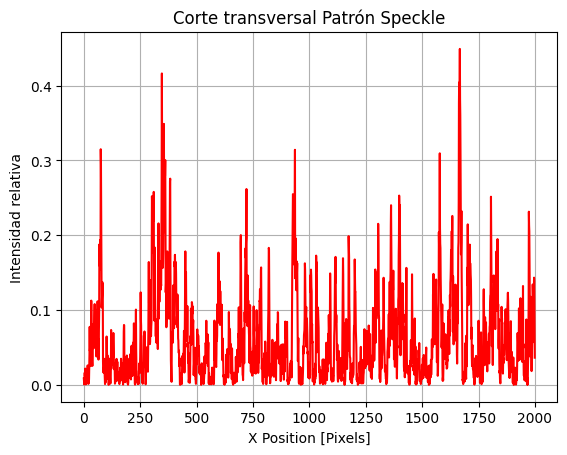

In [ ]:
plt.plot(spectrum_intensity_Speckle[1000], color = 'red')
plt.grid()
plt.xlabel('X Position [Pixels]')
plt.ylabel('Intensidad relativa')
plt.title('Corte transversal Patrón Speckle')
plt.show()

## Corte transversal del espectro de Fourier de la superficie rugosa

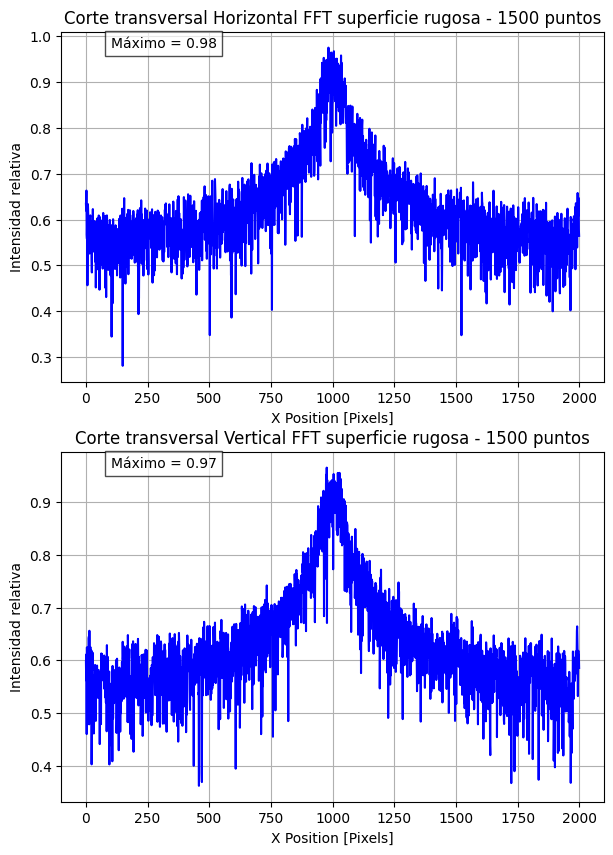

In [ ]:
plt.figure(figsize = (7, 10))

plt.subplot(2, 1, 1)
plt.plot(espectro_fft_SR[int(np.shape(espectro_fft_SR)[0]/2)], color = 'blue')

plt.text(100, np.max(espectro_fft_SR[int(np.shape(espectro_fft_SR)[0]/2)]),
         f"Máximo = {np.max(espectro_fft_SR[int(np.shape(espectro_fft_SR)[0]/2)]):.2f}",
         fontsize = 10, color = "black",
         bbox = dict(facecolor = 'white', alpha=0.7, edgecolor = 'black'))

plt.grid()
plt.xlabel('X Position [Pixels]')
plt.ylabel('Intensidad relativa')
plt.title(f"Corte transversal Horizontal FFT superficie rugosa - {n_surfaces} puntos")

plt.subplot(2, 1, 2)
plt.plot(np.rot90(espectro_fft_SR)[int(np.shape(espectro_fft_SR)[0]/2)], color = 'blue')

plt.text(100, np.max(np.rot90(espectro_fft_SR)[int(np.shape(espectro_fft_SR)[0]/2)]),
         f"Máximo = {np.max(np.rot90(espectro_fft_SR)[int(np.shape(espectro_fft_SR)[0]/2)]):.2f}",
         fontsize = 10, color = "black",
         bbox = dict(facecolor = 'white', alpha=0.7, edgecolor = 'black'))

plt.grid()
plt.xlabel('X Position [Pixels]')
plt.ylabel('Intensidad relativa')
plt.title(f"Corte transversal Vertical FFT superficie rugosa - {n_surfaces} puntos")
plt.show()

In [ ]:
print(f"Maximo de los cortes transversales; Horizontal : {np.max(espectro_fft_SR[int(np.shape(espectro_fft_SR)[0]/2)])}")

Maximo de los cortes transversales; Horizontal : 0.9753936548577494


In [ ]:
print(f"Maximo de los cortes transversales; Horizontal : {np.max(np.rot90(espectro_fft_SR)[int(np.shape(espectro_fft_SR)[0]/2)])}")

Maximo de los cortes transversales; Horizontal : 0.9656216774995418


## Para que sirve el patrón, y el espectro de la superficie rugosa?

Creemosle un daño a la superficie, como un corte circular o tipo ranura.

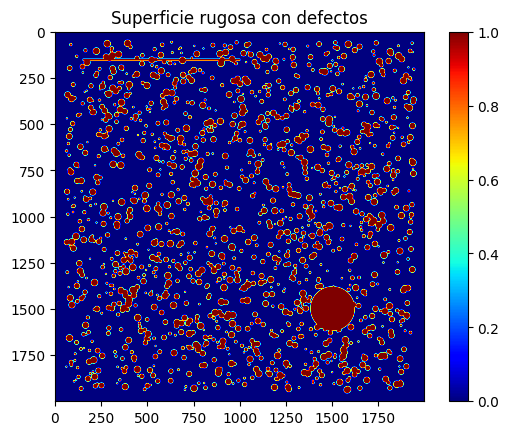

In [ ]:
superficie_agujereada = intensidad_del_campo(campo_speckle)
cv2.circle(superficie_agujereada, (1500, 1500), 120, 1, -1)
cv2.rectangle(superficie_agujereada, (150, 150), (1000, 160), 1, -1)

plt.imshow(superficie_agujereada, cmap = 'jet')
plt.title('Superficie rugosa con defectos')
plt.colorbar()
plt.show()

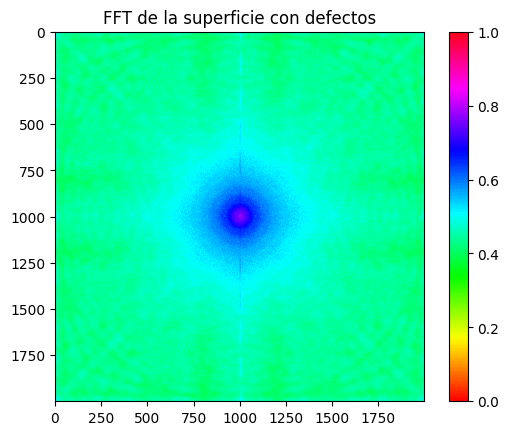

In [ ]:
fft_superficie_agujereada = fftshift(fft2(superficie_agujereada))
espectro_fft_SRA = normalize_image(np.log(0.0001 + np.abs(fft_superficie_agujereada)**2))

plt.imshow(espectro_fft_SRA, cmap = 'hsv')
plt.title('FFT de la superficie con defectos')
plt.colorbar()
plt.show()

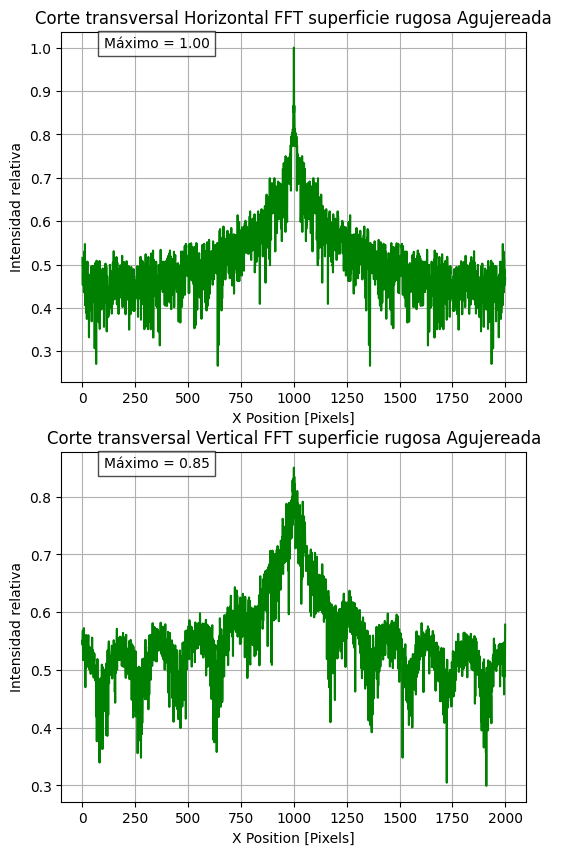

In [ ]:
plt.figure(figsize = (6, 10))

plt.subplot(2, 1, 1)
plt.plot(espectro_fft_SRA[int(np.shape(espectro_fft_SRA)[0]/2)], color = 'green')

plt.text(100, np.max(espectro_fft_SRA[int(np.shape(espectro_fft_SRA)[0]/2)]),
         f"Máximo = {np.max(espectro_fft_SRA[int(np.shape(espectro_fft_SRA)[0]/2)]):.2f}",
         fontsize = 10, color = "black",
         bbox = dict(facecolor = 'white', alpha=0.7, edgecolor = 'black'))

plt.grid()
plt.xlabel('X Position [Pixels]')
plt.ylabel('Intensidad relativa')
plt.title('Corte transversal Horizontal FFT superficie rugosa Agujereada')

plt.subplot(2, 1, 2)
plt.plot(np.rot90(espectro_fft_SRA)[int(np.shape(espectro_fft_SRA)[0]/2)], color = 'green')

plt.text(100, np.max(np.rot90(espectro_fft_SRA)[int(np.shape(espectro_fft_SRA)[0]/2)]),
         f"Máximo = {np.max(np.rot90(espectro_fft_SRA)[int(np.shape(espectro_fft_SRA)[0]/2)]):.2f}",
         fontsize = 10, color = "black",
         bbox = dict(facecolor = 'white', alpha=0.7, edgecolor = 'black'))

plt.grid()
plt.xlabel('X Position [Pixels]')
plt.ylabel('Intensidad relativa')
plt.title('Corte transversal Vertical FFT superficie rugosa Agujereada')
plt.show()

Recordar que estas presentan los maximos de ese estilo debido a que no poseen medios desfasadores, solo el rectangulo es visible en el espacio de Fourier.

## Propagando el campo con defectos

In [ ]:
z_pea_speckle_defectos = 1000

In [ ]:
propagacion_speckle_agujero = compute_A(superficie_agujereada, xv_pea, yv_pea, lam, z_pea_speckle_defectos)

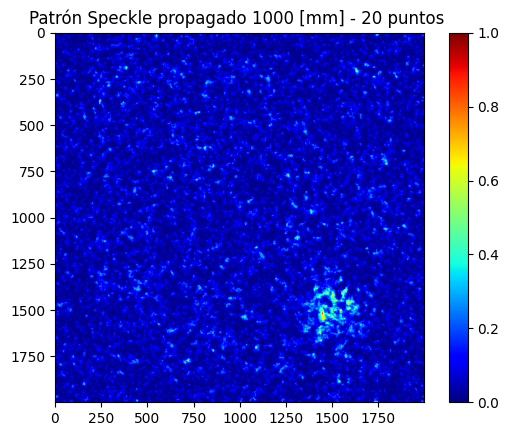

In [ ]:
spectrum_intensity_Speckle_agujero = normalize_image(intensidad_del_campo(propagacion_speckle_agujero))

plt.imshow(spectrum_intensity_Speckle_agujero, cmap = 'jet')
plt.title(f"Patrón Speckle propagado {z_pea_speckle_defectos} [mm] - 20 puntos ")
plt.colorbar()
plt.show()

A partir del analisis del patrón propagado por PEA, se pueden identificar defectos de fabricación o de homogeneidad de las superficies, ya sea por medio de la intensidad de las regiones del patrón o la carencia de moteado en ciertas zonas, tal como se puede observar en el patrón anterior.

Si mi imagen digital mide 2000 x 2000 pixeles, y definí arbitrariamente un rango de 7.0656 mm, esto implica:

In [ ]:
tamaño_fisico_pixel = l_planex/np.shape(propagacion_speckle_agujero)[0]

print(f"El rectangulo mide: {850 * tamaño_fisico_pixel} mm de largo y {50 * tamaño_fisico_pixel} mm de ancho.")
print(f"La perforación circular mide: {120 * tamaño_fisico_pixel} mm de radio")

El rectangulo mide: 3.00288 mm de largo y 0.17664 mm de ancho.
La perforación circular mide: 0.423936 mm de radio


## Metodo del filtado espacial

### Mostremos primero difuminación por perdida de bordes

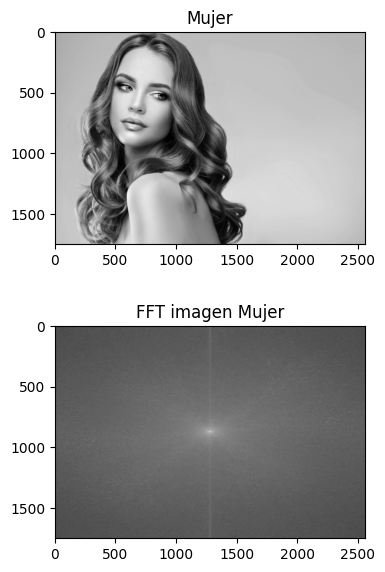

In [ ]:
mujer = cv2.imread(URL_ADAP(r'C:\Users\Felipe\Pictures\Optica_Proyecto\Mujer.webp'), 0)
espectro_mujer = fftshift(fft2(mujer))
fft_mujer = np.log(0.0001 + np.abs(espectro_mujer)**2)

plt.figure(figsize = (4, 7))

plt.subplot(2, 1, 1)
plt.imshow(mujer, cmap = 'gray')
plt.title('Mujer')

plt.subplot(2, 1, 2)
plt.imshow(fft_mujer, cmap = 'gray')
plt.title('FFT imagen Mujer')

plt.show()

In [ ]:
print(np.shape(mujer)[0])

1752


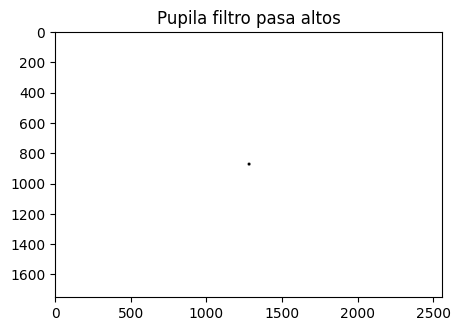

In [ ]:
pupila_circular_mujer = np.ones(np.shape(mujer), dtype = "uint8")
coordxmujer = int(np.shape(mujer)[0]/2)
coordymujer= int(np.shape(mujer)[1]/2)
cv2.circle(pupila_circular_mujer, (coordymujer, coordxmujer), 10, 0, -1)

plt.figure(figsize = (5, 4))
plt.imshow(pupila_circular_mujer, cmap = 'gray')
plt.title('Pupila filtro pasa altos')
plt.show()

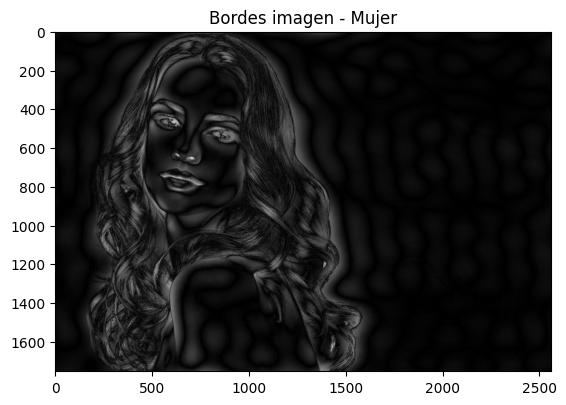

In [ ]:
oceano_distorsionado = ifft2(pupila_circular_mujer * espectro_mujer)

plt.imshow(np.abs(oceano_distorsionado), cmap = 'gray')
plt.title('Bordes imagen - Mujer')
plt.show()

## Imagen mostrada en colores separados

In [ ]:
peces = cv2.imread(URL_ADAP(r'C:\Users\Felipe\Pictures\Optica_Proyecto\Corales y peces 01.jpg'))

print(f"Forma de la imagen en matriz con colores RGB : {np.shape(peces)}")

Forma de la imagen en matriz con colores RGB : (410, 728, 3)


<>:42: SyntaxWarning: invalid escape sequence '\D'
<>:42: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Felipe\AppData\Local\Temp\ipykernel_1276\3223778695.py:42: SyntaxWarning: invalid escape sequence '\D'
  ax.set_title(f'$\Delta = {delta}$ píxeles')


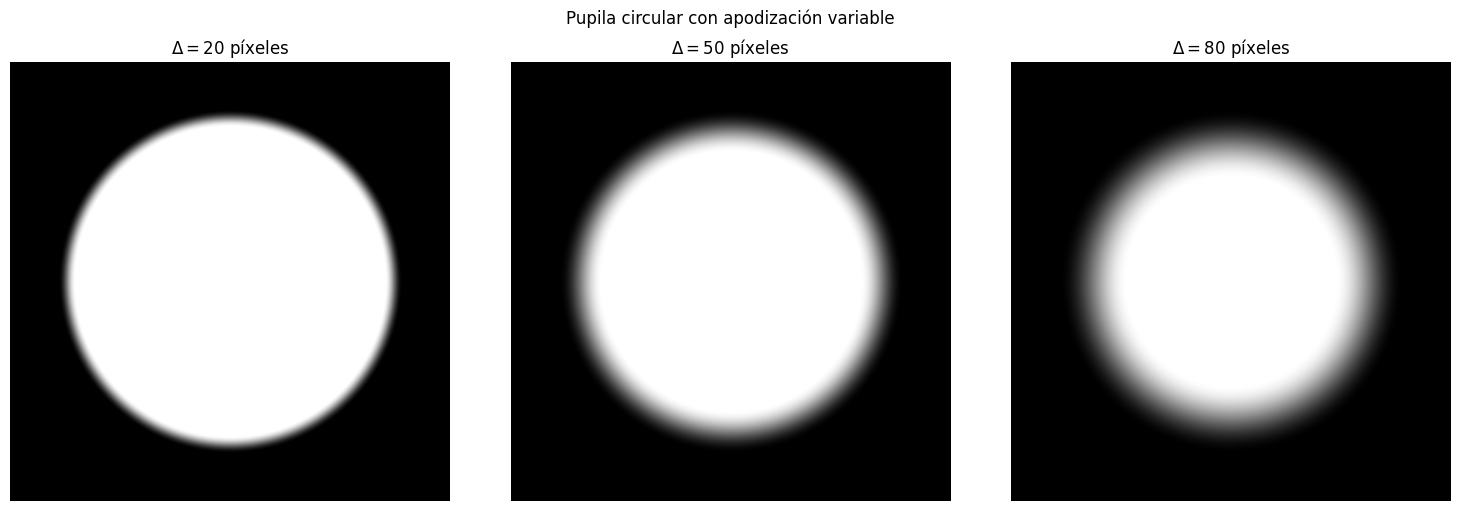

In [ ]:
def circular_pupil_apodization(NH, NV, R, delta):
    """
    Crea una matriz de tamaño N x N que representa una pupila circular
    de radio R con apodización en el borde (taper de ancho delta).

    Parámetros:
      N     : Tamaño de la matriz (en píxeles).
      R     : Radio de la pupila (en píxeles).
      delta : Ancho de la región de apodización (en píxeles), donde 0 < delta <= R.

    Retorna:
      Una matriz 2D con valores entre 0 y 1 que representa la pupila apodizada.
    """
    # Crear una grilla de coordenadas centradas
    x = np.linspace(-NH/2, NH/2 - 1, NH)
    y = np.linspace(-NV/2, NV/2 - 1, NV)
    xv, yv = np.meshgrid(x, y)
    r = np.sqrt(xv**2 + yv**2)

    # Inicializar la pupila: valor 1 donde r <= R-delta, valor 0 donde r > R
    pupil = np.ones_like(r)
    pupil[r > R] = 0

    # En la región de apodización, R-delta <= r <= R, aplicar una transición suave usando una función cosenoidal
    taper_mask = (r >= (R - delta)) & (r <= R)
    pupil[taper_mask] = 0.5 * (1 + np.cos(np.pi * (r[taper_mask] - (R - delta)) / delta))

    return pupil

# Parámetros de la simulación
NH = 512         # Tamaño de la matriz (512x512 píxeles)
NV = 512         # Tamaño de la matriz (512x512 píxeles)
R = 200         # Radio de la pupila en píxeles
delta_values = [20, 50, 80]  # Diferentes anchos de apodización para ver el efecto

# Crear subplots para comparar distintos valores de delta
fig, axes = plt.subplots(1, len(delta_values), figsize=(15, 5), constrained_layout=True)

for ax, delta in zip(axes, delta_values):
    pupil = circular_pupil_apodization(NH, NV, R, delta)
    ax.imshow(pupil, cmap='gray', extent=[-NH/2, NH/2, -NH/2, NH/2])
    ax.set_title(f'$\Delta = {delta}$ píxeles')
    ax.axis('off')

plt.suptitle('Pupila circular con apodización variable')
plt.show()

In [ ]:
pupila_apod = circular_pupil_apodization(np.shape(mujer)[1], np.shape(mujer)[0], 10, 8)
pupila_apod = 1 - pupila_apod

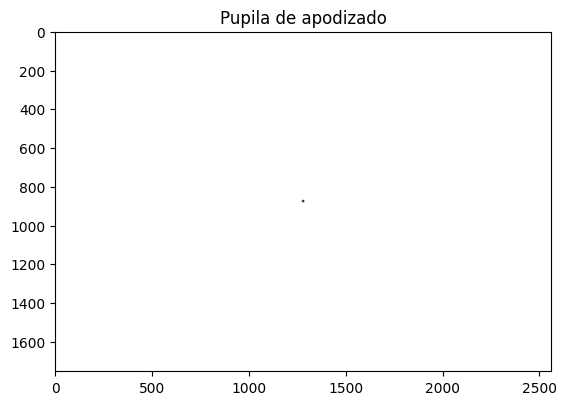

In [ ]:
plt.imshow(pupila_apod, cmap = 'gray')
plt.title('Pupila de apodizado')
plt.show()

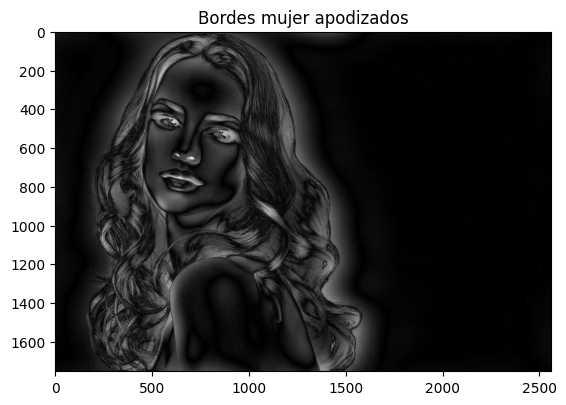

In [ ]:
mujer_bordes_apod = ifft2(pupila_apod * espectro_mujer)

plt.imshow(np.abs(mujer_bordes_apod), cmap = 'gray')
plt.title('Bordes mujer apodizados')
plt.show()